# KNN:

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [137]:
# Load dataset
df = pd.read_csv(r'booking.csv')

## 1. Initial Data Exploration

In [205]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,4/11/2018,Canceled


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [140]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [141]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [142]:
df['car parking space'].unique()

array([0, 1])

In [143]:
df['repeated'].unique()

array([0, 1])

In [144]:
df['P-C'].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6])

In [145]:
df["P-not-C"].unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36])

## 2. Data Cleaning

In [146]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Handle any duplicates (if found)
df = df.drop_duplicates()

Duplicate rows: 0


## 3. EDA Visualizations

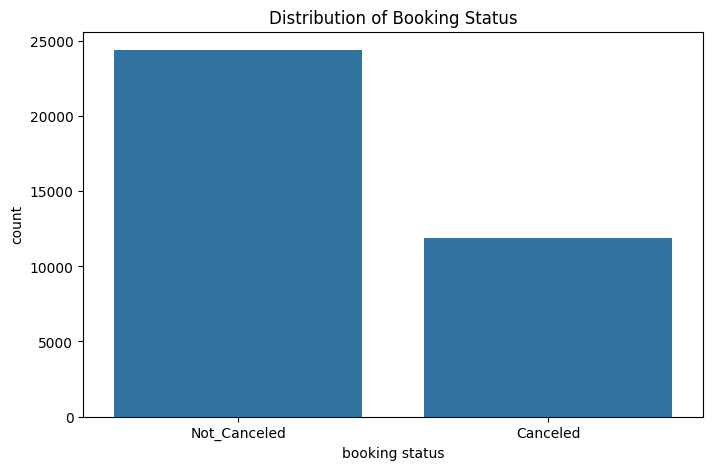

In [147]:
plt.figure(figsize=(8,5))
sns.countplot(x='booking status', data=df)
plt.title('Distribution of Booking Status')
plt.show()

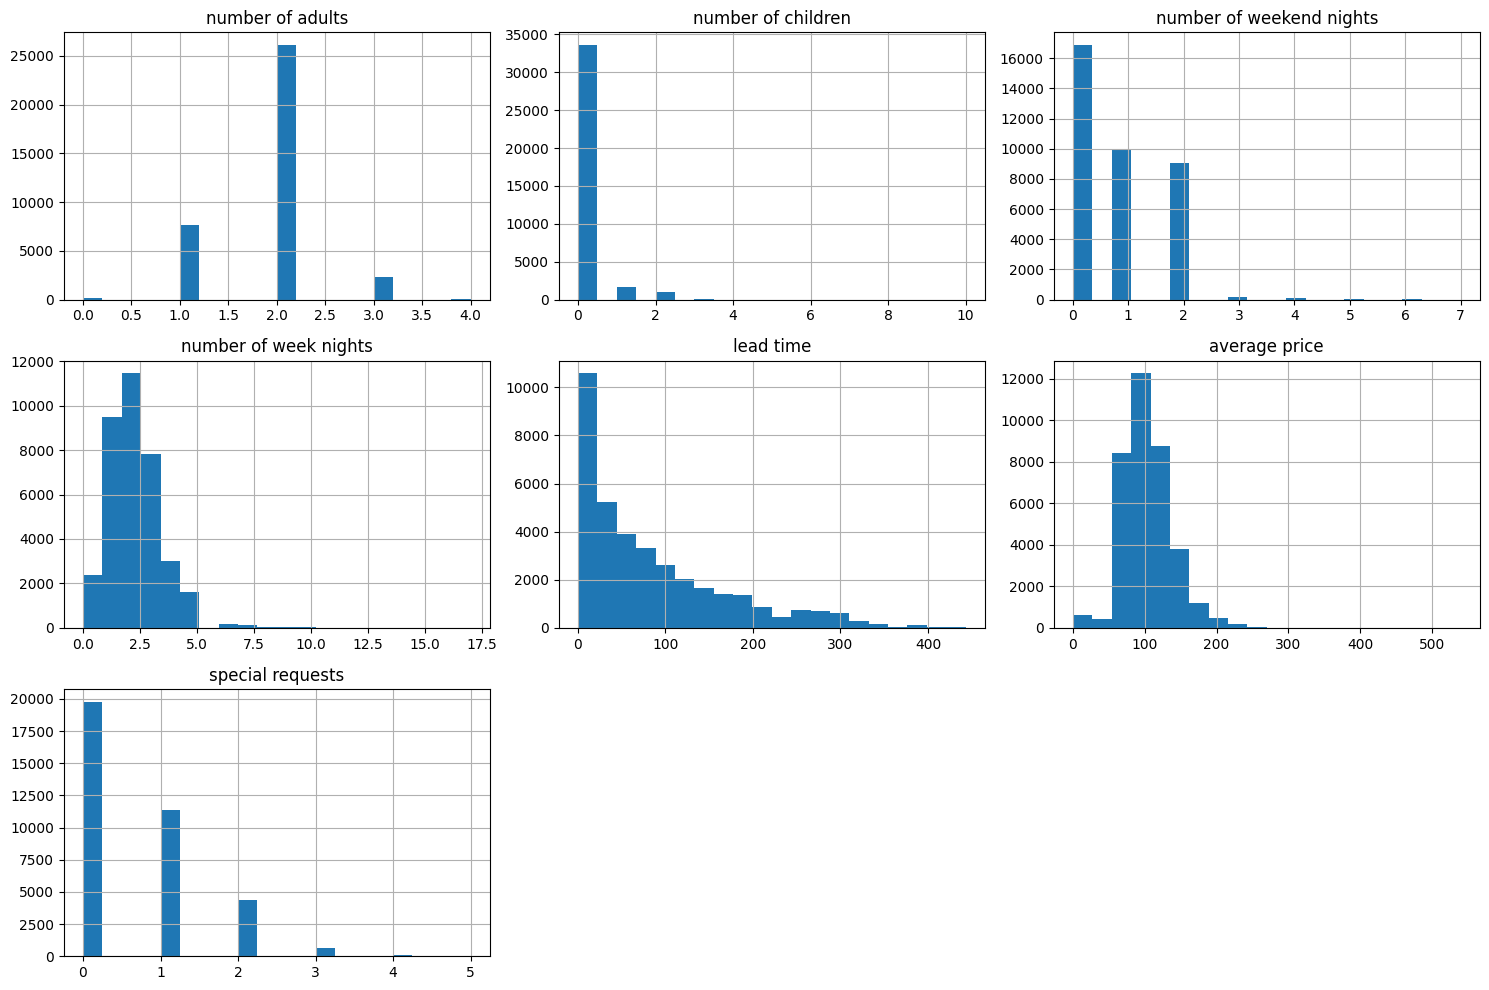

In [148]:
num_cols = ['number of adults', 'number of children', 'number of weekend nights', 
            'number of week nights', 'lead time', 'average price', 'special requests']

df[num_cols].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

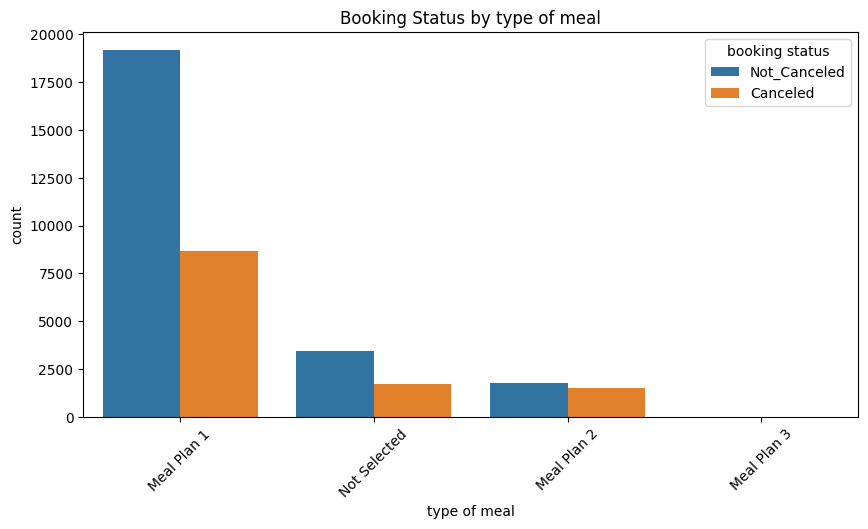

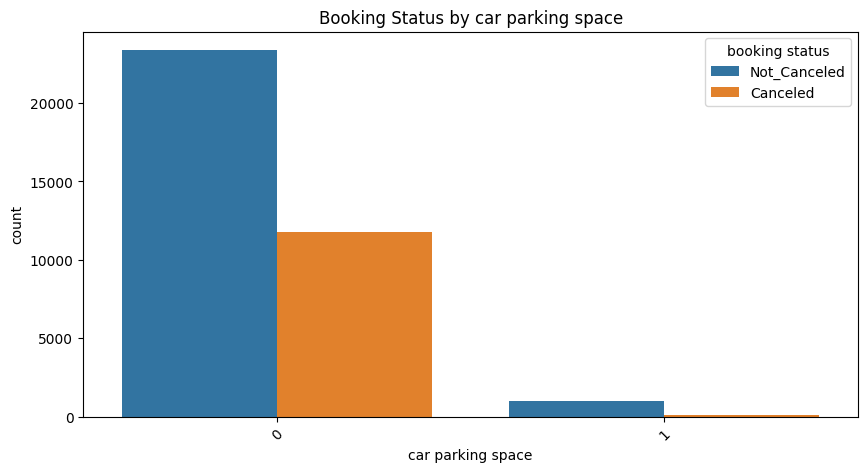

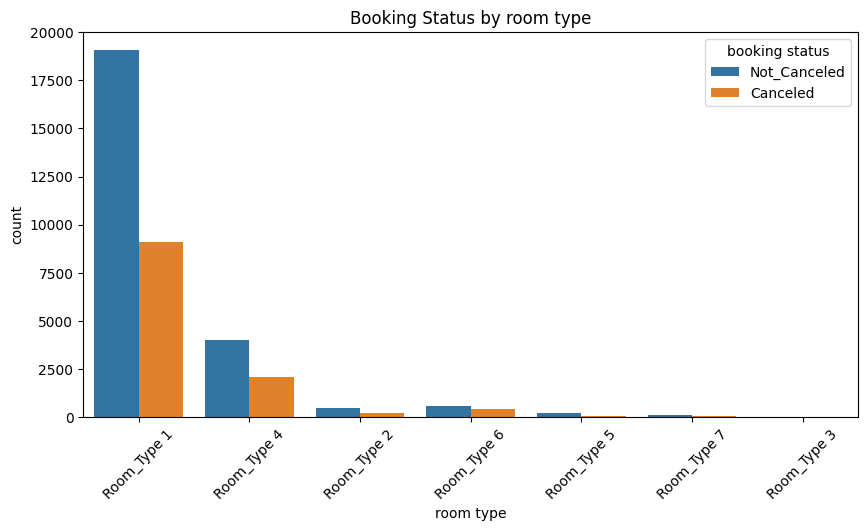

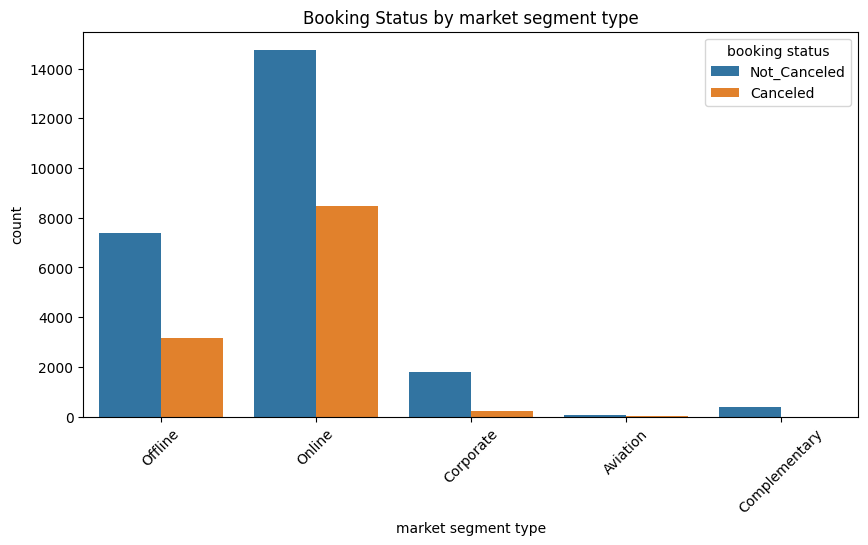

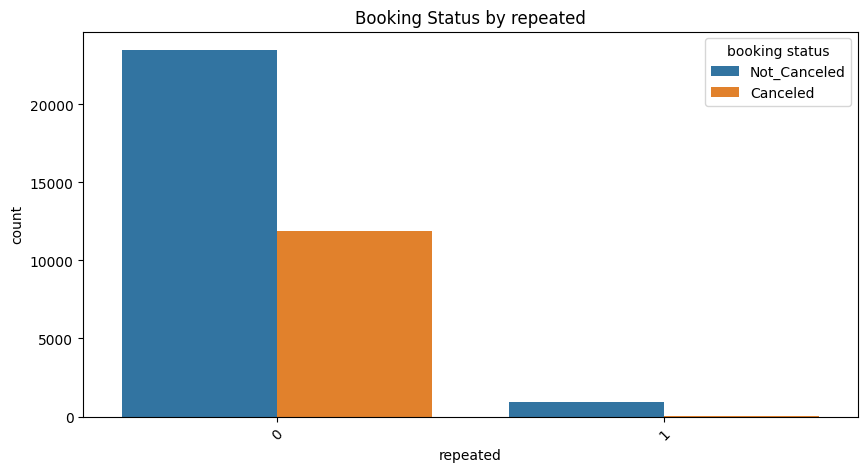

In [149]:
cat_cols = ['type of meal', 'car parking space', 'room type', 'market segment type', 'repeated']

for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='booking status', data=data)
    plt.title(f'Booking Status by {col}')
    plt.xticks(rotation=45)
    plt.show()

## 4. Feature Engineering

In [150]:
df.head(2)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled


In [207]:
# Create a binary target variable
df['is_canceled'] = df['booking status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# Create total nights stayed feature
df['total_nights'] = df['number of weekend nights'] + df['number of week nights']

# Create total guests feature
df['total_guests'] = df['number of adults'] + df['number of children']


## Heatmap:

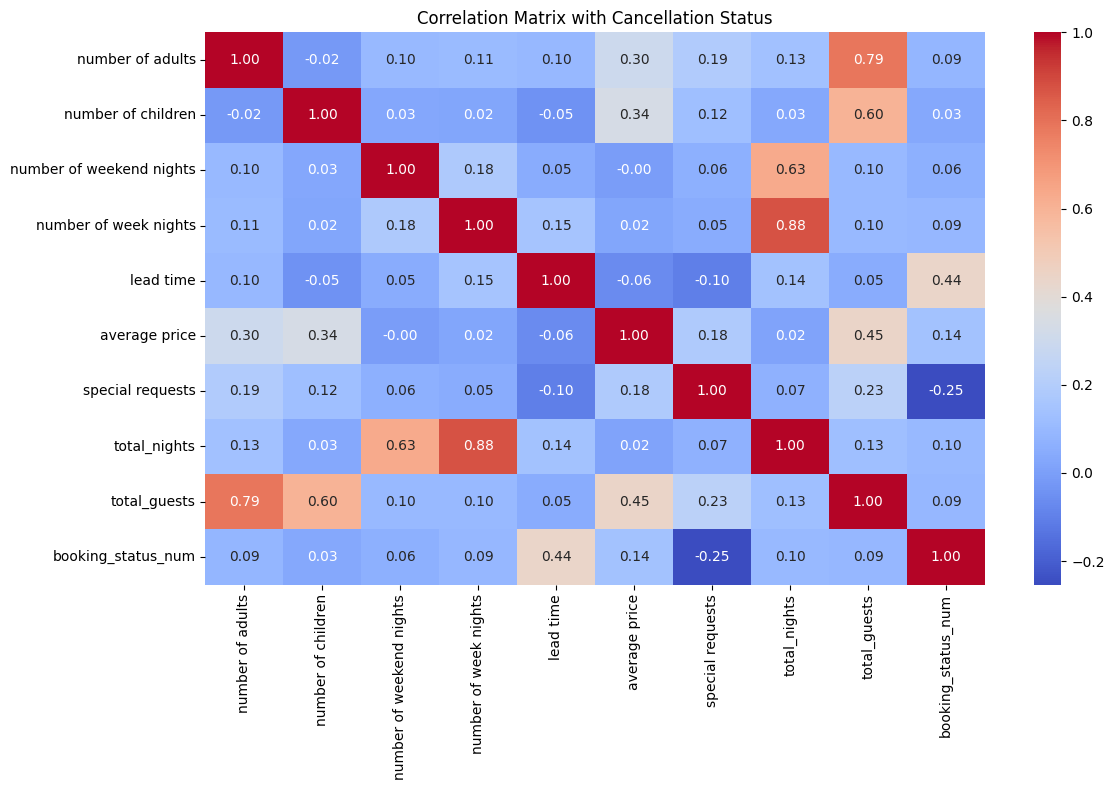

In [152]:
# First, let's create the numerical version of the booking status
df['booking_status_num'] = df['booking status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# Now define our numerical columns (make sure these exist in your DataFrame)
num_cols = ['number of adults', 'number of children', 'number of weekend nights', 
            'number of week nights', 'lead time', 'average price', 'special requests',
            'total_nights', 'total_guests']  # We included num columns from featuring engineering as well

# Create the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols + ['booking_status_num']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Cancellation Status')
plt.tight_layout()
plt.show()

## ENCODING + SCALING:

In [153]:
df["car parking space"].unique()

array([0, 1])

In [154]:
df["repeated"].unique()

array([0, 1])

In [155]:
df["P-C"].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6])

In [156]:
df["P-not-C"].unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36])

In [208]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables
cat_features = ['type of meal', 'room type', 'market segment type']
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Select features and target
features = ['number of adults', 'number of children', 'number of weekend nights',
            'number of week nights', 'type of meal', 'car parking space',
            'room type', 'lead time', 'market segment type', 'repeated',
            'average price', 'special requests', 'total_nights', 'total_guests']

X = df[features]
y = df['is_canceled']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['lead time', 'average price', 'total_nights', 'total_guests']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## KNN:

In [158]:

# Train KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4855
           1       0.80      0.73      0.76      2402

    accuracy                           0.85      7257
   macro avg       0.83      0.82      0.83      7257
weighted avg       0.85      0.85      0.85      7257



# LOGISTIC REGRESSION: 

In [159]:
from sklearn.linear_model import LogisticRegression


In [160]:

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4855
           1       0.75      0.61      0.67      2402

    accuracy                           0.80      7257
   macro avg       0.79      0.75      0.77      7257
weighted avg       0.80      0.80      0.80      7257



## XGBOOST:

In [161]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report  # For classification

# Initialize and fit the model
model = xgb.XGBClassifier(  # Use XGBRegressor for regression
    objective='binary:logistic',  # Change for multi-class or regression
    eval_metric='logloss',        # Use 'auc', 'error', etc. as needed
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8819071241559874
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4855
           1       0.86      0.77      0.81      2402

    accuracy                           0.88      7257
   macro avg       0.88      0.85      0.86      7257
weighted avg       0.88      0.88      0.88      7257



## Hyperparamter Tuning(GridSearchCv):

In [164]:

# Initialize the base model
model = xgb.XGBClassifier(random_state=42)  # Use XGBRegressor for regression

# Define hyperparameter grid
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=5,
    scoring='accuracy',
    verbose=1,  # Shows progress
    n_jobs=-1   # Uses all CPU cores
)

# Fit GridSearchCV
grid.fit(X_train, y_train)

# Output best parameters
print("Best parameters found:", grid.best_params_)

# Train final model with best parameters
final_model = xgb.XGBClassifier(**grid.best_params_, random_state=42)
final_model.fit(X_train, y_train)

# Generate predictions
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Evaluate performance
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}

Model Evaluation:
Accuracy: 0.8836984980019291
ROC AUC: 0.9452376195257813

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4855
           1       0.86      0.78      0.82      2402

    accuracy                           0.88      7257
   macro avg       0.88      0.86      0.87      7257
weighted avg       0.88      0.88      0.88      7257



## Feature importance 

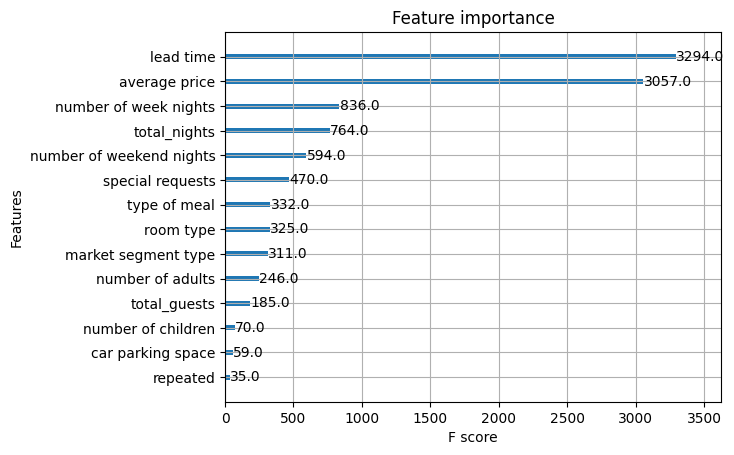

In [165]:
xgb.plot_importance(final_model)
plt.show()

### Key Metrics

- Classification: Accuracy, Precision, Recall, F1, ROC AUC.

- Regression: MSE, RMSE, R².

## SHAP VALUES:

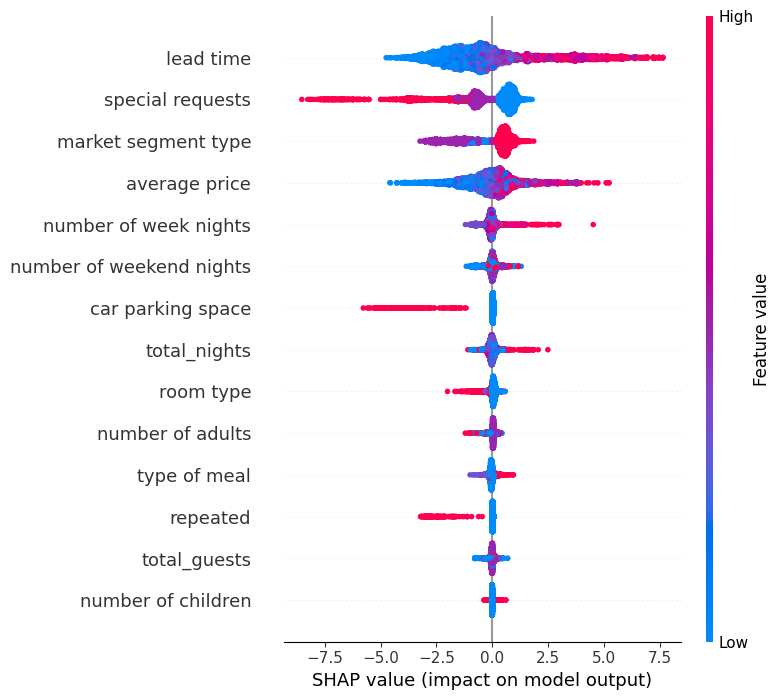

In [166]:
import shap

# Explain the model's predictions
explainer = shap.TreeExplainer(final_model)  # For tree-based models
shap_values = explainer.shap_values(X_test)

# Global feature importance
shap.summary_plot(shap_values, X_test)

### **Interpreting SHAP Summary Plot**

The SHAP plot reveals how each feature impacts your model's predictions. Here's a breakdown of key insights:

---

#### **1. High-Impact Features**
| Feature               | SHAP Range | Interpretation                                                                 |
|-----------------------|------------|--------------------------------------------------------------------------------|
| **Lead Time**         | ±7.5       | *Strongest driver*: Extreme values (very high/low) significantly sway predictions. |
| **Average Price**     | ±5.0       | Mid-to-high prices likely reduce cancellation risk (negative SHAP).             |
| **Special Requests**  | ±5.0       | More requests → Lower cancellation risk (negative SHAP).                        |

---

#### **2. Directional Insights**
- **Negative SHAP Values (Left Side)**:  
  - Features like `average_price` and `special_requests` push predictions *lower* (e.g., reduce cancellation likelihood).  
  - *Example*: Higher prices correlate with more committed bookings.  

- **Positive SHAP Values (Right Side)**:  
  - Long `lead_time` or high `total_nights` increase cancellation risk.  

---

#### **3. Low-Impact Features**
| Feature               | SHAP Range | Action                                                                         |
|-----------------------|------------|--------------------------------------------------------------------------------|
| `car parking space`   | ±1.0       | Minimal impact → Consider removing.                                            |
| `repeated`           | ±0.5       | Negligible → Likely safe to drop.                                              |

---

### **Actionable Recommendations**
1. **Business Insights**:  
   - **Discounts for Early Bookings**: Long lead times increase cancellations; offer incentives for shorter booking windows.  
   - **Promote Special Requests**: Encourage requests (e.g., "Add a free breakfast") to reduce cancellations.  

2. **Model Optimization**:  
   - **Remove Trivial Features**:  
     ```python
     X = X.drop(['car parking space', 'repeated', 'number of children'], axis=1)
     ```  
   - **Bin Lead Time**:  
     ```python
     df['lead_time_bins'] = pd.cut(df['lead_time'], bins=[0, 7, 30, 365])
     ```  

3. **Validate with Domain Knowledge**:  
   - Confirm if `total_nights` should negatively impact cancellations (or if this signals data leakage).  

---

### **SHAP vs. XGBoost Importance**  
- **XGBoost F-score**: Ranks `lead_time` and `average_price` as top features (consistent with SHAP).  
- **SHAP Adds Direction**: Reveals *how* features affect outcomes (e.g., high price → fewer cancellations).  

---

### **Next Steps**  
✅ **Retrain Model**: Use simplified feature set.  
✅ **Monitor**: Track real-world cancellation rates vs. predictions.  
✅ **Explainability**: Share SHAP plots with stakeholders to justify model logic.  

### Remove trivial features:

In [209]:
X = X.drop(['car parking space', 'repeated', 'number of children'], axis=1)

In [179]:
print(X.columns.tolist()) #checking if dropped

['number of adults', 'number of weekend nights', 'number of week nights', 'type of meal', 'room type', 'lead time', 'market segment type', 'average price', 'special requests', 'total_nights', 'total_guests']


# BEST ACCURACY SO FAR:

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the base model
model = xgb.XGBClassifier(random_state=42)  # Use XGBRegressor for regression

# Define hyperparameter grid
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=5,
    scoring='accuracy',
    verbose=1,  # Shows progress
    n_jobs=-1   # Uses all CPU cores
)

# Fit GridSearchCV
grid.fit(X_train, y_train)

# Output best parameters
print("Best parameters found:", grid.best_params_)

# Train final model with best parameters
final_model = xgb.XGBClassifier(**grid.best_params_, random_state=42)
final_model.fit(X_train, y_train)

# Generate predictions
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Evaluate performance
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}

Model Evaluation:
Accuracy: 0.8892104175279041
ROC AUC: 0.9459307590192325

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4879
           1       0.86      0.79      0.82      2378

    accuracy                           0.89      7257
   macro avg       0.88      0.86      0.87      7257
weighted avg       0.89      0.89      0.89      7257



Accuracy improved by removing trivial features.

### **What to Do next?**
#### **A. Feature Engineering**
- **Create Interaction Terms**:  
  ```python
  df['price_per_night'] = df['average_price'] / df['total_nights']
  ```


#### **B. Hyperparameter Tuning**  
Refine your XGBoost parameters (e.g., adjust `max_depth` or `learning_rate`):  
```python
params = {
    'max_depth': [4, 5, 6],       # Test narrower ranges
    'learning_rate': [0.05, 0.1],  # Smaller steps
    'scale_pos_weight': [1, 2]     # If class imbalance exists
}
```

#### **C. Address Class Imbalance**  
If cancellations (class `1`) are rare:  
```python
model = xgb.XGBClassifier(scale_pos_weight=ratio)  # ratio = count_class_0 / count_class_1
```

#### **D. Try Alternative Models**  
- **Random Forest**: Compare performance as a sanity check.  
- **Logistic Regression**: Interpretable baseline.  



### **3. Validate with SHAP**  
Confirm feature impacts align with domain knowledge:  
```python
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
```
- If `lead_time` bins show no SHAP patterns, revert to the original feature.  



### **4. Business-Driven Adjustments**  
- **Cost-Sensitive Learning**: Optimize for recall/precision if misclassification costs vary.  
- **Manual Rules**: Override model predictions for edge cases (e.g., bookings with `lead_time > 365 days`).  



### **Key Takeaway**  
- **Binning/removing features isn’t always about accuracy**—it’s about simplicity and stability.  
- **Next Steps**:  
  1. Revert `lead_time` to continuous if bins hurt performance.  
  2. Engineer new features (e.g., interactions).  
  3. Tune hyperparameters or adjust class weights.  


In [181]:
df['price_per_night'] = df['average price'] / df['total_nights'] #added afterwards check if accurcay improves

In [182]:
df.head(2)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,...,P-not-C,average price,special requests,date of reservation,booking status,is_canceled,total_nights,total_guests,booking_status_num,price_per_night
0,INN00001,1,1,2,5,0,0,0,224,3,...,0,88.00,0,10/2/2015,Not_Canceled,0,7,2,0,12.571429
1,INN00002,1,0,1,3,3,0,0,5,4,...,0,106.68,1,11/6/2018,Not_Canceled,0,4,1,0,26.670000


In [183]:
X["price_per_night"] = df["price_per_night"]

In [184]:
X.head(2)

,number of adults,number of weekend nights,number of week nights,type of meal,room type,lead time,market segment type,average price,special requests,total_nights,total_guests,price_per_night
0,1,2,5,0,0,224,3,88.00,0,7,2,12.571429
1,1,1,3,3,0,5,4,106.68,1,4,1,26.670000


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the base model
model = xgb.XGBClassifier(random_state=42)  # Use XGBRegressor for regression

# Define hyperparameter grid
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=5,
    scoring='accuracy',
    verbose=1,  # Shows progress
    n_jobs=-1   # Uses all CPU cores
)

# Fit GridSearchCV
grid.fit(X_train, y_train)

# Output best parameters
print("Best parameters found:", grid.best_params_)

# Train final model with best parameters
final_model = xgb.XGBClassifier(**grid.best_params_, random_state=42)
final_model.fit(X_train, y_train)

# Generate predictions
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Evaluate performance
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

Model Evaluation:
Accuracy: 0.8863166597767672
ROC AUC: 0.9433478144175679

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4879
           1       0.86      0.78      0.82      2378

    accuracy                           0.89      7257
   macro avg       0.88      0.86      0.87      7257
weighted avg       0.89      0.89      0.88      7257



In [190]:
X = X.drop('price_per_night',axis =1)

### Note:
- Accuracy wasnt improved so we dropped the newly enginered feature.

In [ ]:
from xgboost import XGBClassifier

## Addressing class imbalance + hyperparamter tuning:

In [ ]:
y[:5]

0    0
1    0
2    1
3    1
4    1
Name: is_canceled, dtype: int64

In [ ]:

# 2. Calculate class weight ratio
class_ratio = len(y[y == 0]) / len(y[y == 1])  # majority/minority
print(f"Class ratio (not cancelled/cancelled): {class_ratio:.2f}")

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Define parameter grid with class weighting
params = {
     'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'scale_pos_weight': [1, class_ratio],  # 1=no weighting, ratio=balanced
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# 5. Initialize and run GridSearchCV
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',  # Better for imbalanced data than 'auc'
    random_state=42,
    n_jobs=-1
)

grid = GridSearchCV(
    estimator=model,
    param_grid=params,
    cv=5,
    scoring='roc_auc',  # Focus on AUC for imbalanced data
    verbose=3,
    n_jobs=-1
)

grid.fit(X_train, y_train)

# 6. Results
print("\nBest parameters:", grid.best_params_)
print("Best CV AUC score:", grid.best_score_)

# 7. Evaluate on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nTest Set Performance:")
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))





Class ratio (not cancelled/cancelled): 2.05
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 2.0519808226091345, 'subsample': 1.0}
Best CV AUC score: 0.9361557807633997

Test Set Performance:

Model Evaluation:
Accuracy: 0.8798401543337467
ROC AUC: 0.9457485531700629

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4879
           1       0.80      0.84      0.82      2378

    accuracy                           0.88      7257
   macro avg       0.86      0.87      0.87      7257
weighted avg       0.88      0.88      0.88      7257



In [ ]:
df.head(2)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled


## Neural Networks:

X shape: (36285, 11), y shape: (36285,)
X dtype: float64, y dtype: int64
Epoch 1/100


c:\Users\PMYLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


908/908 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7214 - loss: 0.5716 - precision: 0.5946 - recall: 0.5245 - roc_auc: 0.7460 - val_accuracy: 0.8003 - val_loss: 0.4514 - val_precision: 0.7418 - val_recall: 0.5992 - val_roc_auc: 0.8502
Epoch 2/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7760 - loss: 0.4750 - precision: 0.7005 - recall: 0.5511 - roc_auc: 0.8248 - val_accuracy: 0.8119 - val_loss: 0.4248 - val_precision: 0.7828 - val_recall: 0.5896 - val_roc_auc: 0.8663
Epoch 3/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7880 - loss: 0.4610 - precision: 0.7198 - recall: 0.5730 - roc_auc: 0.8334 - val_accuracy: 0.8105 - val_loss: 0.4298 - val_precision: 0.8574 - val_recall: 0.5059 - val_roc_auc: 0.8704
Epoch 4/100
908/908 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7878 - loss: 0.4573 - precision: 0.7272 - recall: 0.5794 - roc_auc: 0.8402 - val_accuracy: 0.8228 - val_loss: 0.4159 - val_precision: 0.8020 - val_recall: 0.6098 - val_roc_auc: 0.8711
Epoch 5/

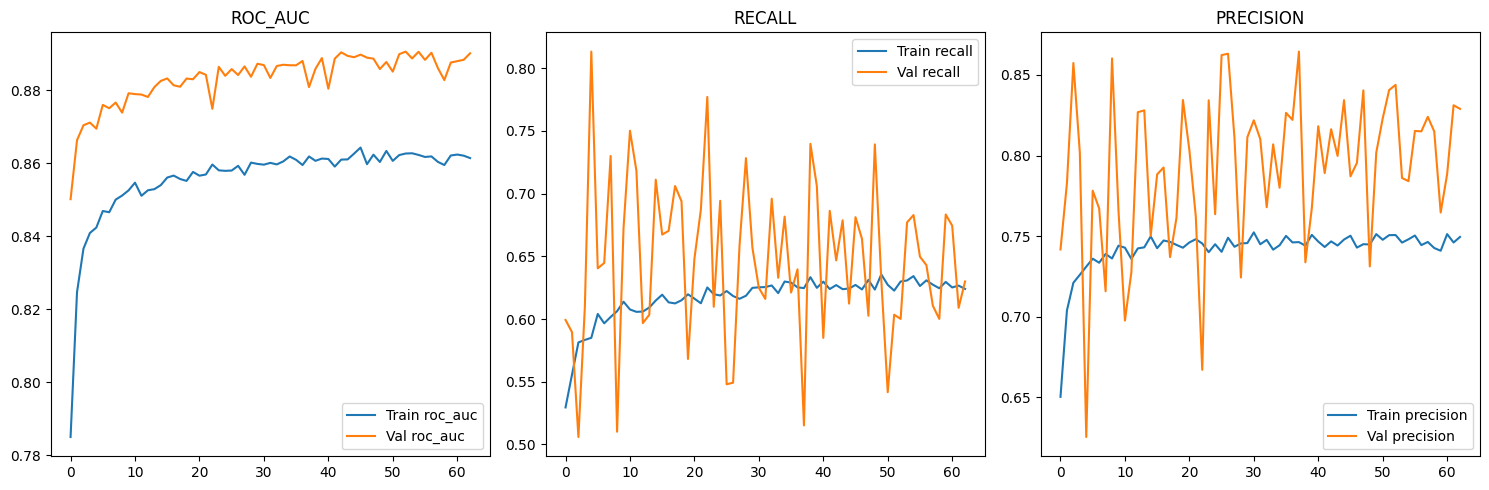

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# 1. Convert data to numpy arrays if they're pandas DataFrames
X = X.values if hasattr(X, 'values') else X
y = y.values if hasattr(y, 'values') else y

# 2. Verify data shapes
print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"X dtype: {X.dtype}, y dtype: {y.dtype}")

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Convert to float32 for TensorFlow
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# 5. Handle class imbalance
# class_weight = {0: 1., 1: 2.05}  # Note: values as floats

# 6. Build Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='roc_auc'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.Precision(name='precision')
    ]
)

# 7. Train with early stopping
early_stop = EarlyStopping(
    monitor='val_roc_auc',
    patience=10,
    mode='max',
    restore_best_weights=True,
    verbose=1
)

try:
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        #class_weight=class_weight,
        callbacks=[early_stop],
        verbose=1
    )
except Exception as e:
    print(f"Error during training: {e}")
    print("Debugging info:")
    print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
    print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
    print(f"Unique y values: {np.unique(y_train)}")
    raise

# 8. Evaluation
test_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nTest Set Evaluation:")
print(classification_report(y_test, test_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict(X_test).ravel()))

# 9. Plot training history
plt.figure(figsize=(15, 5))
metrics = ['roc_auc', 'recall', 'precision']
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    plt.plot(history.history[metric], label=f'Train {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}')
    plt.title(metric.upper())
    plt.legend()
plt.tight_layout()
plt.show()